In [132]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [133]:
data = pd.read_csv('Iris.csv')
data.describe()
data['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [134]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [135]:
data_copy = data.drop('Id', axis=1)

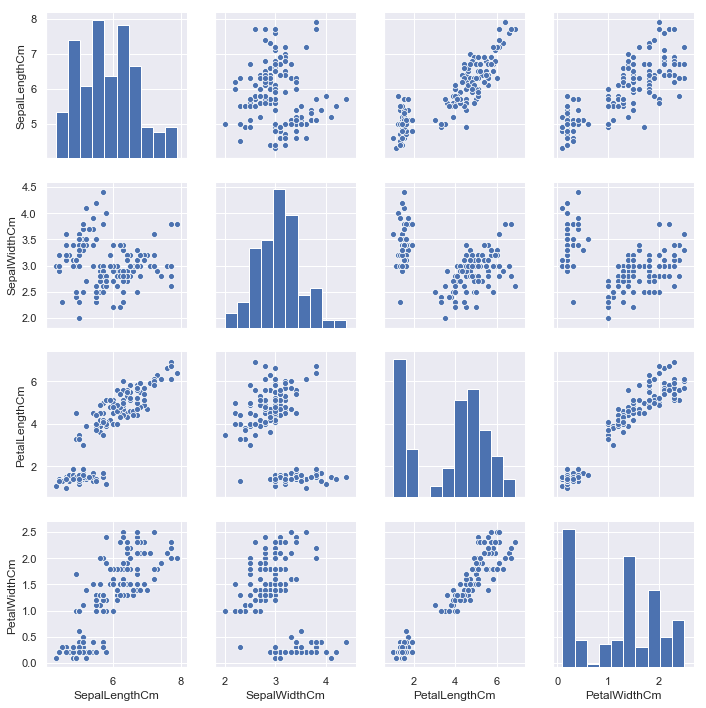

In [136]:
g = sns.pairplot(data_copy)
plt.show()

In [137]:
X = data_copy.drop('Species', axis=1)
y = data_copy['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [138]:
x_scaled = preprocessing.scale(data_copy.drop('Species', axis=1))
x_scaled
wcss = []
cl_num = 10
for i in range(1, cl_num):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
wcss

[600.0,
 223.73200573676345,
 140.96581663074699,
 114.42714544645855,
 91.02810323740371,
 81.37114469503187,
 73.22211585930286,
 62.682453823719655,
 55.35686596540206]

Text(0, 0.5, 'Within-cluster Sum of Squares')

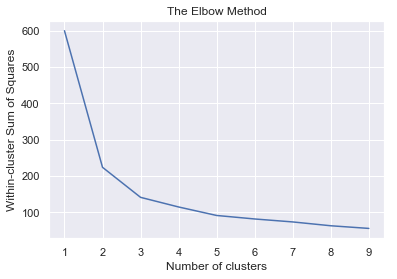

In [139]:
number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

In [140]:
kmeans = KMeans(2)
kmeans.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [141]:
clusters = X.copy()
clusters['cluster_pred']=kmeans.fit_predict(x_scaled)

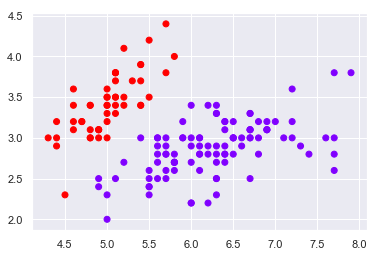

In [142]:
plt.scatter(clusters['SepalLengthCm'], clusters['SepalWidthCm'], c=clusters['cluster_pred'], cmap='rainbow')

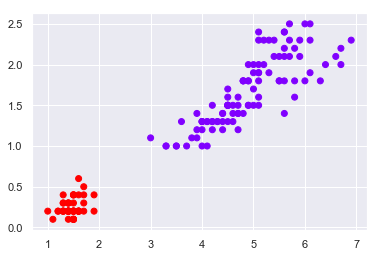

In [143]:
plt.scatter(clusters['PetalLengthCm'], clusters['PetalWidthCm'], c=clusters['cluster_pred'], cmap='rainbow')

In [144]:
kmeans = KMeans(3)
kmeans.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [145]:
clusters['cluster_pred']=kmeans.fit_predict(x_scaled)

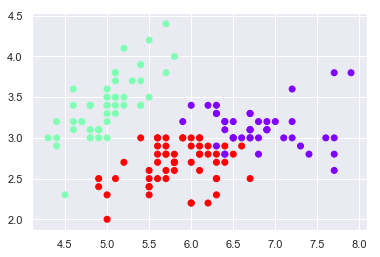

In [146]:
plt.scatter(clusters['SepalLengthCm'], clusters['SepalWidthCm'], c=clusters['cluster_pred'], cmap='rainbow')

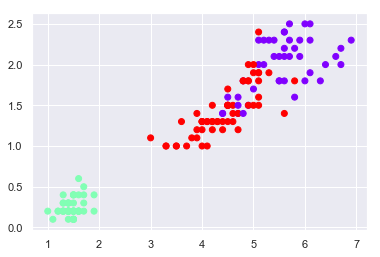

In [147]:
plt.scatter(clusters['PetalLengthCm'], clusters['PetalWidthCm'], c=clusters['cluster_pred'], cmap='rainbow')

In [148]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

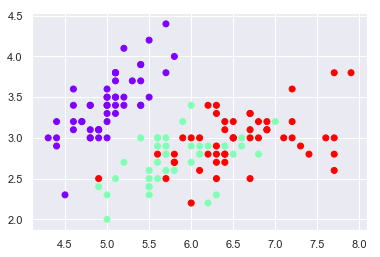

In [149]:
data['Species'] = data['Species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
data.head()
plt.scatter(clusters['SepalLengthCm'], clusters['SepalWidthCm'], c=data['Species'], cmap='rainbow')

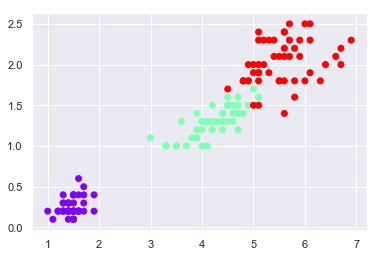

In [151]:
plt.scatter(clusters['PetalLengthCm'], clusters['PetalWidthCm'], c=data['Species'], cmap='rainbow')